In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tqdm import tqdm

In [4]:
a1 = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])
a2 = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])

np.array_equal(a1, a2)

True

In [5]:
BASE_PATH = 'D:/Learning/LJMU-masters/recommender_system/workspace/rest_procssed_data/'
review_file = BASE_PATH+'filt_rest_review_data.tar.gz'
restaurant_feat_file = BASE_PATH+'rest_context_feat.csv'
rest_emd_path = BASE_PATH+'restaurant_context_embeddings.csv'

SEED = 133610
K=5

In [6]:
rest_reviews_df = pd.read_csv(review_file)
print(rest_reviews_df.columns.values)
print(rest_reviews_df.shape)
rest_reviews_df.head()

['business_id' 'stars' 'date' 'user_id']
(1324324, 4)


,business_id,stars,date,user_id
0,3fw2X5bZYeW9xCz_zGhOHg,3.0,2016-05-07 01:21:02,jlu4CztcSxrKx56ba1a5AQ
1,NyLYY8q1-H3hfsTwuwLPCg,4.0,2015-01-03 22:47:34,86J5DwcFk4f4In1Vxe2TvA
2,y-Iw6dZflNix4BdwIyTNGA,3.0,2014-06-27 21:19:23,_N7Ndn29bpll_961oPeEfw
3,qx6WhZ42eDKmBchZDax4dQ,5.0,2017-03-27 01:14:37,DzZ7piLBF-WsJxqosfJgtA
4,9nTF596jDvBBia2EXXiOOg,1.0,2014-04-19 15:03:17,q3GeSW9dWN9r_ocqFkhrvg


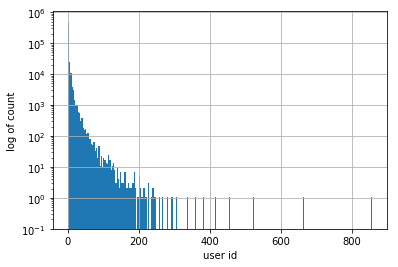

In [7]:
count_reviews_by_user = rest_reviews_df.groupby(['user_id'])['date'].count().reset_index()
count_reviews_by_user.columns = ['user_id','review_count']
fig, ax = plt.subplots()
count_reviews_by_user.review_count.hist(ax=ax,bins=250, bottom=0.1)
ax.set_yscale('log')
plt.ylabel('log of count')
plt.xlabel('user id')
plt.show()

## Create Train and Test split

In [8]:
users_list = count_reviews_by_user[(count_reviews_by_user.review_count > 10) & (count_reviews_by_user.review_count <= 300)].user_id
print(len(users_list))
shuffled_user_list = shuffle(users_list, random_state=SEED)
cutoff = int(0.8*len(shuffled_user_list))
train_users = shuffled_user_list[:cutoff]
test_users = shuffled_user_list[cutoff:]

print(len(train_users))
print(len(test_users))

15662
12529
3133


In [9]:
# rest_reviews_df = rest_reviews_df[rest_reviews_df.stars >= 3.0]
rest_reviews_df = rest_reviews_df[rest_reviews_df.user_id.isin(users_list)]
rest_reviews_df.shape

(372169, 4)

In [13]:
sorted_df = rest_reviews_df.sort_values(['user_id','date'])
print(sorted_df.shape)
sorted_df.head()

(372169, 4)


,business_id,stars,date,user_id
848393,ifEHr-ZnGFSKgJVsywiAFg,5.0,2009-01-16 21:49:36,---1lKK3aKOuomHnwAkAow
150004,rq5dgoksPHkJwJNQKlGQ7w,5.0,2010-10-16 23:31:28,---1lKK3aKOuomHnwAkAow
782885,ow5ku7hfMqU94mylTd3WlQ,5.0,2010-11-09 20:24:31,---1lKK3aKOuomHnwAkAow
876783,iPM85PQMs7QoAxw-Og9ChQ,3.0,2010-11-16 03:15:16,---1lKK3aKOuomHnwAkAow
862425,ifEHr-ZnGFSKgJVsywiAFg,2.0,2010-11-16 03:23:07,---1lKK3aKOuomHnwAkAow


In [14]:
temp_df = sorted_df.loc[sorted_df.user_id == '---1lKK3aKOuomHnwAkAow']
user_grp_df = sorted_df.groupby(['user_id'])
window_size = 5

In [10]:
# user_grp_df.head()

In [12]:
new_df = pd.DataFrame(columns=['state','action','reward','next_state','recall'])
for user_id, df in tqdm(user_grp_df):
    list_of_dicts = []
    for i in range(df.shape[0]):
        df_dict = {'state':[],'action':'','reward':0.0,'next_state':[],'recall':[]}
        space = list(df.business_id.unique())
        state = list([str(val) for val in np.random.choice(space, size=window_size)])
        future_actions = list(np.random.choice(space, size=2))
        
        action = str(future_actions[0])
        reward = float(df.loc[df.business_id == action].head(1).stars)
        next_state = state.copy()
        next_state.append(action)
        next_state = next_state[1:]
        df_dict['state'] = ','.join(state)
        df_dict['action'] = action
        df_dict['reward'] = reward
        df_dict['next_state'] = ','.join(next_state)
        df_dict['recall'] = ','.join(future_actions)
#         print('state {} - action {} - reward {} - next_state {}'.format(df_dict['state'],df_dict['action'],df_dict['reward'],df_dict['next_state']))
        list_of_dicts.append(df_dict)
    new_df = new_df.append(list_of_dicts, ignore_index=False)
        
print(new_df.shape)
new_df.head()

  1%|▋                                                                                                                                  | 84/15662 [00:02<06:58, 37.25it/s]


KeyboardInterrupt: 

In [10]:
new_df.to_csv(BASE_PATH+'dqn_offline_train_validation.csv',index=False)

In [10]:
dd = np.asarray([1,2,3,4,5,6,7,8,9])
dd = dd.reshape(3,3)
a = np.array([6,3,9])[np.newaxis,:]
dd = np.append(dd, a, axis=0)
dd[1:]

array([[4, 5, 6],
       [7, 8, 9],
       [6, 3, 9]])

## Testing the RL simulation fucntions

In [15]:
rest_embedding_cdf = pd.read_csv(rest_emd_path)
print(rest_embedding_cdf.shape)
rest_embedding_cdf = rest_embedding_cdf.set_index('business_id')
rest_embedding_cdf.head()

(19590, 11)


,0,1,2,3,4,5,6,7,8,9
business_id,,,,,,,,,,
QXAEGFB4oINsVuTFxEYKFQ,4.411848,4.738783,9.329696,13.222891,1.758909,4.306650,5.077082,0.568810,0.000000,6.865017
1Dfx3zM-rW4n-31KeC8sJg,2.127881,4.583820,8.213978,2.470980,3.485499,4.024044,3.452238,6.611355,0.600296,2.409309
1RHY4K3BD22FK7Cfftn8Mg,4.881931,0.234610,0.276599,6.049745,6.167278,2.428050,4.997796,6.372932,3.795377,3.091788
tstimHoMcYbkSC4eBA1wEg,3.093885,3.616591,2.917479,3.739008,9.100592,3.093930,5.404335,0.905019,0.892846,6.373060
NDuUMJfrWk52RA-H-OtrpA,5.673331,4.015204,7.196591,7.836281,1.073583,2.293062,1.579514,6.271926,2.804626,3.172067


In [16]:
rest_embedding_cdf['0'].max()

9.952936

In [17]:
','.join([str(a) for a in rest_embedding_cdf.loc['QXAEGFB4oINsVuTFxEYKFQ'].tolist()])

'4.4118485,4.738783,9.329696,13.222891,1.7589085999999998,4.3066497,5.0770817,0.5688105,0.0,6.8650174'

In [18]:
sample = sorted_df.loc[sorted_df.user_id == '---1lKK3aKOuomHnwAkAow']
simulation_df = pd.DataFrame(columns=['user_id','state','action','reward','next_state'])
simulation_raw_df = pd.DataFrame(columns=['user_id','state','action','reward','next_state'])
for user_id, each_grp in tqdm(sample.groupby(['user_id'])):
    list_of_raw_dicts = []
    list_of_dicts = []
    window=5 # K
    each_grp = each_grp.tail(50)
    for i in range(0,each_grp.shape[0], 1):
        if each_grp.shape[0] == i+window+1:
            break
        else:
            temp_df = each_grp[i:i+window]
            state = list(temp_df.business_id)
#             print(state)
            action = str(each_grp.iloc[i+window+1].business_id)
            reward = float(each_grp.iloc[i+window+1].stars)
            next_state = state.copy()
            if reward >= 3.0:
                next_state.append(action)
                next_state = next_state[1:]
            print('state {}, action {}, reward {}, next_state {}'.format(len(state),len([action]),reward,len(next_state)))
            df_raw_dict = {'user_id': user_id,
                       'state': ','.join(state),
                       'action': str(action),
                       'reward': float(reward),
                       'next_state': ','.join(next_state)}
            list_of_raw_dicts.append(df_raw_dict)
            
            df_dict = {'user_id': user_id,
                       'state': ','.join(['|'.join([str(a) for a in rest_embedding_cdf.loc[str(bid)].tolist()]) for bid in state]),
                       'action': '|'.join([str(a) for a in rest_embedding_cdf.loc[str(action)].tolist()]),
                       'reward': reward,
                       'next_state': ','.join(['|'.join([str(a) for a in rest_embedding_cdf.loc[str(bid)].tolist()]) for bid in next_state])}
#             print(df_dict)
            list_of_dicts.append(df_dict)
    
    simulation_df = simulation_df.append(list_of_dicts, ignore_index=False)
    simulation_raw_df = simulation_raw_df.append(list_of_raw_dicts, ignore_index=False)

print(simulation_df.shape)
simulation_df.head()

  0%|                                                                                                                                                | 0/1 [00:00<?, ?it/s]

state 5, action 1, reward 4.0, next_state 5
state 5, action 1, reward 4.0, next_state 5
state 5, action 1, reward 5.0, next_state 5
state 5, action 1, reward 5.0, next_state 5
state 5, action 1, reward 2.0, next_state 5
state 5, action 1, reward 5.0, next_state 5
state 5, action 1, reward 4.0, next_state 5
state 5, action 1, reward 5.0, next_state 5
state 5, action 1, reward 5.0, next_state 5
state 5, action 1, reward 5.0, next_state 5
state 5, action 1, reward 1.0, next_state 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.67it/s]


(11, 5)


,user_id,state,action,reward,next_state
0,---1lKK3aKOuomHnwAkAow,5.105682|3.02343|1.1998029|2.6459227000000003|...,3.907493|3.9790266000000005|0.85891354|2.99556...,4.0,3.6259165|4.555624|1.7463031000000002|3.389558...
1,---1lKK3aKOuomHnwAkAow,3.6259165|4.555624|1.7463031000000002|3.389558...,2.1000068|5.064063|1.3642833|3.633889|7.801534...,4.0,5.943884400000001|2.053497|2.2759242000000004|...
2,---1lKK3aKOuomHnwAkAow,5.943884400000001|2.053497|2.2759242000000004|...,2.4830651|5.704142|0.17315382|4.15246960000000...,5.0,3.21387|4.1962743|2.4558017000000003|3.489384|...
3,---1lKK3aKOuomHnwAkAow,3.21387|4.1962743|2.4558017000000003|3.489384|...,1.5584882|4.790303700000001|0.621162|4.0098743...,5.0,5.105682|3.02343|1.1998029|2.6459227000000003|...
4,---1lKK3aKOuomHnwAkAow,5.105682|3.02343|1.1998029|2.6459227000000003|...,4.054323|6.1892065999999994|0.6355050999999999...,2.0,5.105682|3.02343|1.1998029|2.6459227000000003|...


In [22]:
display(simulation_raw_df.iloc[0].values)

array(['---1lKK3aKOuomHnwAkAow',
       'ifEHr-ZnGFSKgJVsywiAFg,rq5dgoksPHkJwJNQKlGQ7w,ow5ku7hfMqU94mylTd3WlQ,iPM85PQMs7QoAxw-Og9ChQ,ifEHr-ZnGFSKgJVsywiAFg',
       'y8d90Pt16Nip-B5UXWBP-w', 4.0,
       'rq5dgoksPHkJwJNQKlGQ7w,ow5ku7hfMqU94mylTd3WlQ,iPM85PQMs7QoAxw-Og9ChQ,ifEHr-ZnGFSKgJVsywiAFg,y8d90Pt16Nip-B5UXWBP-w'],
      dtype=object)

In [20]:
simulation_raw_df

,user_id,state,action,reward,next_state
0,---1lKK3aKOuomHnwAkAow,"ifEHr-ZnGFSKgJVsywiAFg,rq5dgoksPHkJwJNQKlGQ7w,...",y8d90Pt16Nip-B5UXWBP-w,4.0,"rq5dgoksPHkJwJNQKlGQ7w,ow5ku7hfMqU94mylTd3WlQ,..."
1,---1lKK3aKOuomHnwAkAow,"rq5dgoksPHkJwJNQKlGQ7w,ow5ku7hfMqU94mylTd3WlQ,...",Qy_tDaVTWlS14fEglzo1Tg,4.0,"ow5ku7hfMqU94mylTd3WlQ,iPM85PQMs7QoAxw-Og9ChQ,..."
2,---1lKK3aKOuomHnwAkAow,"ow5ku7hfMqU94mylTd3WlQ,iPM85PQMs7QoAxw-Og9ChQ,...",ZgPnRzWjQR5NtiauGBww7g,5.0,"iPM85PQMs7QoAxw-Og9ChQ,ifEHr-ZnGFSKgJVsywiAFg,..."
3,---1lKK3aKOuomHnwAkAow,"iPM85PQMs7QoAxw-Og9ChQ,ifEHr-ZnGFSKgJVsywiAFg,...",YCEZLECK9IToE8Mysorbhw,5.0,"ifEHr-ZnGFSKgJVsywiAFg,A0X1baHPgw9IiBRivu0G9g,..."
4,---1lKK3aKOuomHnwAkAow,"ifEHr-ZnGFSKgJVsywiAFg,A0X1baHPgw9IiBRivu0G9g,...",zEaGcSVPDQipnRdEZp-F6g,2.0,"ifEHr-ZnGFSKgJVsywiAFg,A0X1baHPgw9IiBRivu0G9g,..."
5,---1lKK3aKOuomHnwAkAow,"A0X1baHPgw9IiBRivu0G9g,y8d90Pt16Nip-B5UXWBP-w,...",p5rpYtxS5xPQjt3MXYVEwA,5.0,"y8d90Pt16Nip-B5UXWBP-w,Qy_tDaVTWlS14fEglzo1Tg,..."
6,---1lKK3aKOuomHnwAkAow,"y8d90Pt16Nip-B5UXWBP-w,Qy_tDaVTWlS14fEglzo1Tg,...",Xspg78dOvuedvuPEUwZBjw,4.0,"Qy_tDaVTWlS14fEglzo1Tg,ZgPnRzWjQR5NtiauGBww7g,..."
7,---1lKK3aKOuomHnwAkAow,"Qy_tDaVTWlS14fEglzo1Tg,ZgPnRzWjQR5NtiauGBww7g,...",5aeR9KcboZmhDZlFscnYRA,5.0,"ZgPnRzWjQR5NtiauGBww7g,YCEZLECK9IToE8Mysorbhw,..."
8,---1lKK3aKOuomHnwAkAow,"ZgPnRzWjQR5NtiauGBww7g,YCEZLECK9IToE8Mysorbhw,...",_sh6mIBWZis66mAjkjN8Qg,5.0,"YCEZLECK9IToE8Mysorbhw,zEaGcSVPDQipnRdEZp-F6g,..."
9,---1lKK3aKOuomHnwAkAow,"YCEZLECK9IToE8Mysorbhw,zEaGcSVPDQipnRdEZp-F6g,...",igHYkXZMLAc9UdV5VnR_AA,5.0,"zEaGcSVPDQipnRdEZp-F6g,p5rpYtxS5xPQjt3MXYVEwA,..."


In [23]:
simulation_df = pd.DataFrame(columns=['user_id','state','action','reward','next_state'])
simulation_raw_df = pd.DataFrame(columns=['user_id','state','action','reward','next_state'])
for user_id, each_grp in tqdm(sorted_df.groupby(['user_id'])):
    list_of_raw_dicts = []
    list_of_dicts = []
    window=5 # K
    each_grp = each_grp.tail(50)
    for i in range(0,each_grp.shape[0], 1):
        if each_grp.shape[0] == i+window+1:
            break
        else:
            temp_df = each_grp[i:i+window]
            state = list(temp_df.business_id)
            action = each_grp.iloc[i+window+1].business_id
            reward = each_grp.iloc[i+window+1].stars
            next_state = state.copy()
            if reward >= 3.0:
                next_state.append(action)
                next_state = next_state[1:]
                
            df_raw_dict = {'user_id': user_id,
                       'state': ','.join(state),
                       'action': str(action),
                       'reward': float(reward),
                       'next_state': ','.join(next_state)}
            list_of_raw_dicts.append(df_raw_dict)
            
            df_dict = {'user_id': user_id,
                   'state': ','.join(['|'.join([str(a) for a in rest_embedding_cdf.loc[str(bid)].tolist()]) for bid in state]),
                   'action': '|'.join([str(a) for a in rest_embedding_cdf.loc[str(action)].tolist()]),
                   'reward': reward,
                   'next_state': ','.join(['|'.join([str(a) for a in rest_embedding_cdf.loc[str(bid)].tolist()]) for bid in next_state])}
            list_of_dicts.append(df_dict)
    
    simulation_df = simulation_df.append(list_of_dicts, ignore_index=False)
    simulation_raw_df = simulation_raw_df.append(list_of_raw_dicts, ignore_index=False)

print(simulation_df.shape)
simulation_df.head()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15662/15662 [46:48<00:00,  3.44it/s]


(242679, 5)


,user_id,state,action,reward,next_state
0,---1lKK3aKOuomHnwAkAow,5.105682|3.02343|1.1998029|2.6459227000000003|...,3.907493|3.9790266000000005|0.85891354|2.99556...,4.0,3.6259165|4.555624|1.7463031000000002|3.389558...
1,---1lKK3aKOuomHnwAkAow,3.6259165|4.555624|1.7463031000000002|3.389558...,2.1000068|5.064063|1.3642833|3.633889|7.801534...,4.0,5.943884400000001|2.053497|2.2759242000000004|...
2,---1lKK3aKOuomHnwAkAow,5.943884400000001|2.053497|2.2759242000000004|...,2.4830651|5.704142|0.17315382|4.15246960000000...,5.0,3.21387|4.1962743|2.4558017000000003|3.489384|...
3,---1lKK3aKOuomHnwAkAow,3.21387|4.1962743|2.4558017000000003|3.489384|...,1.5584882|4.790303700000001|0.621162|4.0098743...,5.0,5.105682|3.02343|1.1998029|2.6459227000000003|...
4,---1lKK3aKOuomHnwAkAow,5.105682|3.02343|1.1998029|2.6459227000000003|...,4.054323|6.1892065999999994|0.6355050999999999...,2.0,5.105682|3.02343|1.1998029|2.6459227000000003|...


In [24]:
simulation_df.to_csv(BASE_PATH+'dqn_simulation_data.csv',index=False)
simulation_raw_df.to_csv(BASE_PATH+'dqn_simulation_raw_data.csv',index=False)

In [27]:
display(simulation_df.iloc[0].values)

array(['---1lKK3aKOuomHnwAkAow',
       '5.105682|3.02343|1.1998029|2.6459227000000003|5.967494|2.747674|5.908251|0.057842492999999995|0.85804594|5.826194,3.6259165|4.555624|1.7463031000000002|3.3895586000000004|7.5602160000000005|0.5086723|5.0327444|1.1266215|6.322655999999999|6.77722,5.943884400000001|2.053497|2.2759242000000004|2.484219|7.068959700000001|1.9090053|2.9084156|2.6935862999999998|5.0421085|8.338318,3.21387|4.1962743|2.4558017000000003|3.489384|8.570441|1.9554832999999998|5.943498|0.7709999|1.5001686|6.353068,5.105682|3.02343|1.1998029|2.6459227000000003|5.967494|2.747674|5.908251|0.057842492999999995|0.85804594|5.826194',
       '3.907493|3.9790266000000005|0.85891354|2.9955611|6.7953149999999996|4.5976105|5.620213|0.0|0.45199290000000003|4.6249733',
       4.0,
       '3.6259165|4.555624|1.7463031000000002|3.3895586000000004|7.5602160000000005|0.5086723|5.0327444|1.1266215|6.322655999999999|6.77722,5.943884400000001|2.053497|2.2759242000000004|2.484219|7.06895970000000

In [34]:
sample = simulation_df[simulation_df.user_id == '---1lKK3aKOuomHnwAkAow']
sample['state'] = sample.state.apply(lambda x: np.asarray([each.split('|') for each in x.split(',')], dtype='float32'))
sample['action'] = sample.action.apply(lambda x: np.asarray(x.split('|'), dtype='float32'))

In [77]:
simulation_raw_df = pd.read_csv(BASE_PATH+'dqn_simulation_raw_data.csv')

In [80]:
grp_data = simulation_raw_df.groupby('user_id')['action'].count().reset_index()

In [84]:
grp_data.action.min()

5

## Testing the Simulator with Cosine Similarity

In [27]:
sample.to_csv('test.csv')

In [28]:
rewards = list()
avg_states = list()
avg_actions = list()
group_sizes = list()
for reward, group_df in sample.groupby(['reward']):
    n_size = group_df.shape[0]
    state_values = group_df['state'].values.tolist()
    action_values = group_df['action'].values.tolist()
    print('reward {} - state values {} action values {}'.format(reward, np.asarray(state_values).shape, np.asarray(action_values).shape))
    avg_states.append(
        np.sum(state_values / np.linalg.norm(state_values, 2, axis=1)[:, np.newaxis], axis=0) / n_size
    )
    avg_actions.append(
        np.sum(action_values / np.linalg.norm(action_values, 2, axis=1)[:, np.newaxis], axis=0) / n_size
    )
    group_sizes.append(n_size)
    rewards.append(reward)

reward 1.0 - state values (1, 5, 6) action values (1, 1)
reward 2.0 - state values (1, 5, 6) action values (1, 1)
reward 4.0 - state values (3, 5, 6) action values (3, 1)
reward 5.0 - state values (6, 5, 6) action values (6, 1)


In [35]:
temp_sample = sample.sample(1)
current_state = temp_sample.state.values[0]
action = temp_sample.action.values[0]
rw = temp_sample.reward.values[0]
rw

4.0

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
import scipy.spatial as sp

In [37]:
alpha = 0.5
comp_current_state = current_state.reshape(1, current_state.shape[0]*current_state.shape[1])
comp_action = action.reshape(1,-1)
probability = list()
denominator = 0.

for idx, row in sample.iterrows():
    state_values = np.asarray(row['state']).reshape(1,30)
    action_values = np.asarray(row['action']).reshape(1,6)
    numerator = (alpha * cosine_similarity(state_values, comp_current_state)) + \
                ((1 - alpha) * cosine_similarity(action_values, comp_action))
    probability.append(numerator)
    denominator += numerator
probability /= denominator
simulate_rewards = sample.iloc[int(np.argmax(probability))]['reward']
simulate_rewards

4.0

In [38]:
alpha = 0.5
comp_current_state = current_state.reshape(1, current_state.shape[0]*current_state.shape[1])
comp_action = action.reshape(1,-1)
probability = list()
denominator = 0.
# change a different way to calculate simulated reward
for s, a in zip(avg_states, avg_actions):
    s = s.reshape(1,s.shape[0]*s.shape[1])
    a = a.reshape(1,-1)
    numerator = (alpha * cosine_similarity(s, comp_current_state)) + \
                ((1 - alpha) * cosine_similarity(a, comp_action))
    probability.append(numerator)
    denominator += numerator
probability /= denominator
result = rewards[int(np.argmax(probability))]
result

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 1 while Y.shape[1] == 6

In [39]:
current_state

array([[-21.18446   ,   0.1743042 ,  -1.2954022 ,   0.25401723,
          0.28795096,  -0.9985907 ],
       [-21.18446   ,   0.1743042 ,  -1.2954022 ,   0.25401723,
          0.28795096,  -0.9985907 ],
       [-21.18446   ,   0.1743042 ,  -1.2954022 ,   0.25401723,
          0.28795096,  -0.9985907 ],
       [-21.18446   ,   0.1743042 ,  -1.2954022 ,   0.25401723,
          0.28795096,  -0.9985907 ],
       [-21.18446   ,   0.1743042 ,  -1.2954022 ,   0.25401723,
          0.28795096,  -0.9985907 ]], dtype=float32)

In [40]:
current_state_query = np.mean(current_state, axis=0)
current_state_query

array([-21.18446   ,   0.1743042 ,  -1.2954022 ,   0.25401723,
         0.28795096,  -0.99859065], dtype=float32)

## Test nearest neighbour with noise

In [41]:
from sklearn.neighbors import NearestNeighbors

In [42]:
model_nn = NearestNeighbors(n_neighbors=20, algorithm='kd_tree')
model_nn.fit(rest_embedding_cdf)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [43]:
action

array([-21.18446   ,   0.1743042 ,  -1.2954022 ,   0.25401723,
         0.28795096,  -0.9985907 ], dtype=float32)

In [44]:
distances, indexs = model_nn.kneighbors([current_state_query])
indexs = list(indexs.flatten())

In [45]:
nearest_data = rest_embedding_cdf.iloc[indexs]
nearest_array = np.asarray(nearest_data.values.tolist())
nearest_array.shape

(20, 6)

In [46]:
data1 = set(nearest_data.index)

In [47]:
mu=0
sigma=0.2
theta=0.5

In [49]:
x = np.ones((6,)) * mu
x

array([0., 0., 0., 0., 0., 0.])

In [50]:
dx = theta * (mu - x) + sigma * np.random.rand(len(x))
dx

array([0.01220985, 0.07678747, 0.07135947, 0.02536492, 0.11650824,
       0.03208213])

In [52]:
x = x+dx
x

array([0.02441971, 0.15357495, 0.14271895, 0.05072984, 0.23301649,
       0.06416426])

In [218]:
print(current_state_query)
mu, sigma = 1.0, 0.1
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, [6,]) 
print(noise)
cs_noise_query = np.multiply(current_state_query, noise)
print(cs_noise_query)

[-21.18446      0.1743042   -1.2954022    0.25401723   0.28795096
  -0.99859065]
[1.09116063 0.98861155 0.97204107 1.16974775 0.8940221  1.17279379]
[-23.11564842   0.17231915  -1.25918411   0.29713609   0.25743452
  -1.17114091]


In [3]:
np.random.uniform(16)

12.389631496575316

In [713]:
distances, indexs = model_nn.kneighbors([cs_noise_query])
indexs = list(indexs.flatten())

In [714]:
nearest_data = rest_embedding_cdf.iloc[indexs]
nearest_array = np.asarray(nearest_data.values.tolist())
nearest_array.shape

(20, 6)

In [715]:
data2 = set(nearest_data.index)

In [716]:
len(data1.intersection(data2))

0

In [ ]:
conte_data = np.asarray(rest_embedding_cdf.values.tolist())

In [723]:
for each in conte_data[indexs]:
    print(each)

[-18.07863808  -3.19723445  -1.06228245   0.22788994   0.3717105
  -0.39108654]
[-18.06394583  -3.11758944  -0.92732875  -0.08241738   0.32043501
  -0.14817674]
[-18.05391961  -3.04432906  -0.88822835  -0.09067406   0.26657598
  -0.28135769]
[-18.05714486  -2.91904067  -1.06690327   0.28439846   0.27157567
  -0.51643296]
[-18.06477294  -3.11710521  -0.83653528   0.02740974   0.28127192
   0.11803404]
[-18.10469714  -3.16821829  -0.88211225   0.39504511   0.18580381
  -0.19850255]
[-18.13427143  -3.19614814  -0.97193845   0.15017298   0.34724535
  -0.03560328]
[-18.14304568  -3.22188488  -1.04742205   0.2702861    0.37950029
  -0.31893099]
[-18.13714747  -3.20650027  -0.97170797   0.15029686   0.34712452
  -0.03533373]
[-18.05671834  -3.07274087  -1.14100353   0.34623564   0.40570162
  -0.67826163]
[-18.13835004  -3.1253807   -1.02535518   0.04989859   0.33226987
  -0.31796033]
[-18.0517016   -3.0767132   -0.83336745  -0.26307867   0.54141739
  -0.42276645]
[-18.07663895  -3.1585216   -

In [4]:
# Create a mixture of two Gaussians:
import tensorflow as tf
# import tensorflow_probability as tfp
tfd = tfp.distributions

mix = 0.3
bimix_gauss = tfd.Mixture(
  cat=tfd.Categorical(probs=[mix, 1.-mix]),
  components=[
    tfd.Normal(loc=-1., scale=0.1),
    tfd.Normal(loc=+1., scale=0.5),
])

# Plot the PDF.
import matplotlib.pyplot as plt
x = tf.linspace(-2., 3., int(1e4)).eval()
plt.plot(x, bimix_gauss.prob(x).eval());

ModuleNotFoundError: No module named 'tensorflow_probability'